In [100]:
import pandas as pd
import requests
import tweepy
import json
import matplotlib.pyplot as plt
%matplotlib inline

# Gathering

In [2]:
#loading the data from the CSV file
df=pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
#downloading the Images from the given URL.
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
with open(url.split('/')[-1],mode='wb') as file:
    file.write(response.content)

In [133]:
##loading the data from the TSV file
image_prd=pd.read_csv('image-predictions.tsv',sep='\t')

In [135]:
#Enter your secrete keys below!
consumer_key = 'CjQhIe8CwC7mFjWkY5l6q7NEb'
consumer_secret = 'bQzu4gMKldgwcHVmTMQQxULmnNjzvADSCxk1M5LC9FDfut0UgO'
access_token = '430048282-d5JzMDwkcoZYpQaKy1qOGFqyzzjkqaQdp8MMBVkh'
access_secret = 'r0Og2p1FOzxkU9aoghxt30R4a4dI1qlGNGReE6gQEssaY'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify =True)

In [19]:
from timeit import default_timer as timer

tweet_tmr_lst=[]
excp_lst=[]
with open('tweet_json.txt','w',encoding='utf-8') as jsnfile:
    for tweetid in df['tweet_id']:
        try:
            start = timer()
            tweet=api.get_status(tweetid,tweet_mode='extended')
            json.dump(tweet._json,jsnfile)
            jsnfile.write('\n')
            end = timer()
            tweet_tmr_lst.append({tweetid:(end-start)})
        except:
            excp_lst.append(tweetid)
            continue

Rate limit reached. Sleeping for: 734
Rate limit reached. Sleeping for: 734


In [136]:
#Read the json data.
tweet_data=[]
with open('tweet_json.txt','r') as tweetf:
    for line in tweetf:
        tweetj=json.loads(line)
        tweet_data.append(tweetj)

In [137]:
#creating dataframe
df_tweet=pd.DataFrame()

In [7]:
df_tweet['tweet_id']=[tweet['id']for tweet in tweet_data]
df_tweet['retweet_count']=[tweet['retweet_count']for tweet in tweet_data]
df_tweet['favourite_count']=[tweet['favorite_count']for tweet in tweet_data]

# Assessing


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
tweet_id           2342 non-null int64
retweet_count      2342 non-null int64
favourite_count    2342 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [10]:
image_prd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
631,794205286408003585,NaN,NaN,2016-11-03 15:51:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Laika. She was a space pupper. The fir...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/794205286...,14,10,Laika,None,None,pupper,None
625,795400264262053889,NaN,NaN,2016-11-06 22:59:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brody. He's trying to make the same fa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/795400264...,12,10,Brody,None,None,None,None
518,810657578271330305,NaN,NaN,2016-12-19 01:26:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pavlov. His floatation device has fail...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/810657578...,11,10,Pavlov,None,None,None,None
1980,672975131468300288,NaN,NaN,2015-12-05 03:05:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chuckles. He is one skeptical pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672975131...,10,10,Chuckles,None,None,pupper,None
1368,702539513671897089,NaN,NaN,2016-02-24 17:04:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Wild Tuscan Poofwiggle. Careful not ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/702539513...,12,10,a,None,None,None,None


In [12]:
df_tweet.sample(5)

,tweet_id,retweet_count,favourite_count
747,778408200802557953,4780,14629
1727,679475951516934144,686,2206
1183,717009362452090881,1043,3437
1524,689835978131935233,812,2288
679,787397959788929025,3134,11675


In [13]:
image_prd.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1800,831911600680497154,https://pbs.twimg.com/media/C4uLLGuUoAAkIHm.jpg,4,bloodhound,0.777562,True,Great_Dane,0.047418,True,Leonberg,0.017943,True
638,681281657291280384,https://pbs.twimg.com/media/CXRmDfWWMAADCdc.jpg,1,Saint_Bernard,0.998830,True,Pekinese,0.000391,True,Great_Pyrenees,0.000224,True
1234,746369468511756288,https://pbs.twimg.com/media/ClujESVXEAA4uH8.jpg,1,German_shepherd,0.622957,True,malinois,0.338884,True,wallaby,0.024161,False
682,683834909291606017,https://pbs.twimg.com/ext_tw_video_thumb/68383...,1,Maltese_dog,0.738449,True,toy_poodle,0.102992,True,Samoyed,0.023247,True
1449,776201521193218049,https://pbs.twimg.com/media/CsWfKadWEAAtmlS.jpg,1,Rottweiler,0.502228,True,black-and-tan_coonhound,0.154594,True,bloodhound,0.135176,True


In [14]:
sum(df.tweet_id.duplicated())

0

In [15]:
sum(df_tweet.tweet_id.duplicated())

0

In [16]:
sum(image_prd.tweet_id.duplicated())

0

In [17]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
df.query('rating_numerator== 960')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [19]:
image_prd.query('tweet_id==835246439529840640')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Quality issues:

#### Twitter archive table:
##### 1-After visiting the dog_rates page on twitter, i saw that the tweet with id '835246439529840640' that have rating_numerator = 960 was not a tweet it was a reply and the rating was 13/10.

##### 3- In_reply_to_status_id and in_reply_to_user_id  columns dont make sense in our analysis since we have only 78 out of 2356 are non-null values and the tweet_id is the key.

##### 4- timestamp is float datatype.

##### 5- The source column is not clear since its URL.

#### Image predictions table:
##### 1- The predictions are proportions.
##### 2- Columns name are not clear.
##### 3- Prediction names are in different cases (lower and upper) 


### Tidiness issues:
##### 1- retweet_count and the favourite_count dont make sense if they are alone in a table.
##### 2- Doggo, floofer, pupper, and puppo are 4 different columns in the archive table.

# Cleaning

In [20]:
#copy the dirty data into new one to start cleaning it.
archive_clean=df.copy()
tweet_clean=df_tweet.copy()
img_clean=image_prd.copy()

In [21]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Define
##### 1-Drop the row with tweet_id '835246439529840640' that have rating_numerator = 960 from the archive table with index 313.

### Code

In [22]:
archive_clean.drop(archive_clean.index[313], inplace=True)

### Test

In [23]:
archive_clean.query('rating_numerator== 960')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [24]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2355 non-null int64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2355 non-null object
source                        2355 non-null object
text                          2355 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2355 non-null int64
rating_denominator            2355 non-null int64
name                          2355 non-null object
doggo                         2355 non-null object
floofer                       2355 non-null object
pupper                        2355 non-null object
puppo                         2355 non-null object
dtypes: float64(4), int64(3), ob

### Define
##### 2- Since we are analysing the tweets, so there is no need for the retweets. Non null values in the retweet columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp should be dropped from the archive table.

### Code

In [25]:
retweet=archive_clean.query('retweeted_status_id!="NaN"' or 'retweeted_status_user_id!="NaN"' or 'retweeted_status_timestamp!="NaN"').index

In [26]:
len(retweet)

181

In [27]:
archive_clean=archive_clean.drop(retweet)

In [28]:
archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1, inplace=True)

### Test

In [29]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2174 non-null int64
in_reply_to_status_id    77 non-null float64
in_reply_to_user_id      77 non-null float64
timestamp                2174 non-null object
source                   2174 non-null object
text                     2174 non-null object
expanded_urls            2117 non-null object
rating_numerator         2174 non-null int64
rating_denominator       2174 non-null int64
name                     2174 non-null object
doggo                    2174 non-null object
floofer                  2174 non-null object
pupper                   2174 non-null object
puppo                    2174 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.8+ KB


### Define
##### 3- Drop In_reply_to_status_id and in_reply_to_user_id columns from the archive table.

### Code


In [30]:
archive_clean.drop(['in_reply_to_status_id' , 'in_reply_to_user_id'], axis=1, inplace=True)

### Test

In [31]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2174 non-null int64
timestamp             2174 non-null object
source                2174 non-null object
text                  2174 non-null object
expanded_urls         2117 non-null object
rating_numerator      2174 non-null int64
rating_denominator    2174 non-null int64
name                  2174 non-null object
doggo                 2174 non-null object
floofer               2174 non-null object
pupper                2174 non-null object
puppo                 2174 non-null object
dtypes: int64(3), object(9)
memory usage: 220.8+ KB


### Define
##### 4- Change the timestamp from float datatype into datetime datatype

### Code

In [32]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp, yearfirst = True)

### Test

In [33]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2174 non-null int64
timestamp             2174 non-null datetime64[ns]
source                2174 non-null object
text                  2174 non-null object
expanded_urls         2117 non-null object
rating_numerator      2174 non-null int64
rating_denominator    2174 non-null int64
name                  2174 non-null object
doggo                 2174 non-null object
floofer               2174 non-null object
pupper                2174 non-null object
puppo                 2174 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 220.8+ KB


### Define
##### 5- Extract from the source url Twitter for iPhone, Vine - Make a Scene, Twitter Web Client and TweetDeck and replace them instead of the URL.

### Code

In [34]:
archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2041
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [35]:
archive_clean.source=archive_clean['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone' )
archive_clean.source=archive_clean['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene' )
archive_clean.source=archive_clean['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client' )
archive_clean.source=archive_clean['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck' )

### Test

In [36]:
archive_clean.source.value_counts()

Twitter for iPhone     2041
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [37]:
archive_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Define
#### 6- change the predictions from proportions to percentages in the image prediction table

### Code

In [38]:
img_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [39]:
img_clean.p1_conf=img_clean['p1_conf'].apply(lambda x: x*100)
img_clean.p2_conf=img_clean['p2_conf'].apply(lambda x: x*100)
img_clean.p3_conf=img_clean['p3_conf'].apply(lambda x: x*100)

### Test

In [40]:
img_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,46.5074,True,collie,15.6665,True,Shetland_sheepdog,6.14285,True


### Define
#### 7- Rename the columns in the image prediction table to be more clear

### Code

In [41]:
img_clean=img_clean.rename(columns={'jpg_url': 'img_url', 'p1':'prediction_1', 'p1_conf':'conf_percentage_1','p1_dog':'breed_prediction_1', 
                  'p2':'prediction_2', 'p2_conf':'conf_percentage_2','p2_dog':'breed_prediction_2',
                  'p3':'prediction_3', 'p3_conf':'conf_percentage_3','p3_dog':'breed_prediction_3'}
                          )

### Test

In [42]:
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id              2075 non-null int64
img_url               2075 non-null object
img_num               2075 non-null int64
prediction_1          2075 non-null object
conf_percentage_1     2075 non-null float64
breed_prediction_1    2075 non-null bool
prediction_2          2075 non-null object
conf_percentage_2     2075 non-null float64
breed_prediction_2    2075 non-null bool
prediction_3          2075 non-null object
conf_percentage_3     2075 non-null float64
breed_prediction_3    2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Define
#### 8- Make all the prediction names of the same letter case. prediction_1, prediction_2 and prediction_3 must be with upper case.

### Code

In [43]:
img_clean.head()

,tweet_id,img_url,img_num,prediction_1,conf_percentage_1,breed_prediction_1,prediction_2,conf_percentage_2,breed_prediction_2,prediction_3,conf_percentage_3,breed_prediction_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,46.5074,True,collie,15.66650,True,Shetland_sheepdog,6.14285,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,50.6826,True,miniature_pinscher,7.41917,True,Rhodesian_ridgeback,7.20100,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,59.6461,True,malinois,13.85840,True,bloodhound,11.61970,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,40.8143,True,redbone,36.06870,True,miniature_pinscher,22.27520,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,56.0311,True,Rottweiler,24.36820,True,Doberman,15.46290,True


In [44]:
img_clean['prediction_1']=img_clean['prediction_1'].str.capitalize()
img_clean['prediction_2']=img_clean['prediction_2'].str.capitalize()
img_clean['prediction_3']=img_clean['prediction_3'].str.capitalize()

### Test

In [45]:
img_clean.sample(5)

,tweet_id,img_url,img_num,prediction_1,conf_percentage_1,breed_prediction_1,prediction_2,conf_percentage_2,breed_prediction_2,prediction_3,conf_percentage_3,breed_prediction_3
1030,711306686208872448,https://pbs.twimg.com/media/Cd8Rpl0W0AAN1kU.jpg,1,Leatherback_turtle,28.0835,False,Loggerhead,12.32900,False,Dandie_dinmont,8.67925,True
959,705591895322394625,https://pbs.twimg.com/media/CcrEFQdUcAA7CJf.jpg,1,Basenji,87.7207,True,Italian_greyhound,4.78542,True,Miniature_pinscher,3.56381,True
732,686730991906516992,https://pbs.twimg.com/media/CYfCMdFWAAA44YA.jpg,1,Tibetan_mastiff,33.8812,True,Newfoundland,18.09250,True,Golden_retriever,18.00230,True
1382,765395769549590528,https://pbs.twimg.com/media/Cp87Y0jXYAQyjuV.jpg,1,Pembroke,50.9491,True,Cardigan,33.04010,True,Shetland_sheepdog,3.88749,True
651,682003177596559360,https://pbs.twimg.com/media/CXb2RcDUsAEnkJb.jpg,1,Triceratops,24.9872,False,Chimpanzee,6.09293,False,Mask,5.02210,False


# Tidiness issues:

### Define:
#### 1- Merge both tweet_clean table and the archive_clean into one table

### Code:

In [46]:
archive_clean=archive_clean.merge(tweet_clean, on="tweet_id", how = 'inner')

In [47]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2172
Data columns (total 14 columns):
tweet_id              2173 non-null int64
timestamp             2173 non-null datetime64[ns]
source                2173 non-null object
text                  2173 non-null object
expanded_urls         2116 non-null object
rating_numerator      2173 non-null int64
rating_denominator    2173 non-null int64
name                  2173 non-null object
doggo                 2173 non-null object
floofer               2173 non-null object
pupper                2173 non-null object
puppo                 2173 non-null object
retweet_count         2173 non-null int64
favourite_count       2173 non-null int64
dtypes: datetime64[ns](1), int64(5), object(8)
memory usage: 254.6+ KB


### Test:

In [48]:
archive_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favourite_count
795,750086836815486976,2016-07-04 22:00:12,TweetDeck,This is Spanky. He was a member of the 2002 US...,https://twitter.com/dog_rates/status/750086836...,12,10,Spanky,None,None,None,None,591,2305
1518,680970795137544192,2015-12-27 04:37:44,Twitter for iPhone,I thought I made this very clear. We only rate...,https://twitter.com/dog_rates/status/680970795...,9,10,None,None,None,None,None,717,2564
251,837471256429613056,2017-03-03 01:14:41,Twitter for iPhone,This is Vincent. He's suave as h*ck. Will be y...,https://twitter.com/dog_rates/status/837471256...,12,10,Vincent,None,None,None,None,2477,13483


### Define:
#### 2- Create a new column  " dog_stage"  as 'categorical' datatype in the archive table with variables doggo, floofer, pupper, and puppo.

### Code:

In [49]:
archive_clean['dog_stage'] = archive_clean.text.str.extract('(doggo | floofer | pupper | puppo)', expand = True)

In [50]:
archive_clean.dog_stage=archive_clean.dog_stage.astype('category')

In [51]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2172
Data columns (total 15 columns):
tweet_id              2173 non-null int64
timestamp             2173 non-null datetime64[ns]
source                2173 non-null object
text                  2173 non-null object
expanded_urls         2116 non-null object
rating_numerator      2173 non-null int64
rating_denominator    2173 non-null int64
name                  2173 non-null object
doggo                 2173 non-null object
floofer               2173 non-null object
pupper                2173 non-null object
puppo                 2173 non-null object
retweet_count         2173 non-null int64
favourite_count       2173 non-null int64
dog_stage             240 non-null category
dtypes: category(1), datetime64[ns](1), int64(5), object(8)
memory usage: 257.0+ KB


In [52]:
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

### Test:

In [53]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2172
Data columns (total 11 columns):
tweet_id              2173 non-null int64
timestamp             2173 non-null datetime64[ns]
source                2173 non-null object
text                  2173 non-null object
expanded_urls         2116 non-null object
rating_numerator      2173 non-null int64
rating_denominator    2173 non-null int64
name                  2173 non-null object
retweet_count         2173 non-null int64
favourite_count       2173 non-null int64
dog_stage             240 non-null category
dtypes: category(1), datetime64[ns](1), int64(5), object(4)
memory usage: 189.1+ KB


In [54]:
archive_clean.head(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favourite_count,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8378,38257,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6186,32798,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4092,24698,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8520,41586,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9229,39761,NaN
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,3070,19956,NaN
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,2036,11681,NaN
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,18607,64571,NaN
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,4212,27429,NaN
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,7279,31482,doggo


### Storing and Analysing

In [118]:
archive_clean.to_csv('twitter_archive_master.csv', index= False)
img_clean.to_csv('image_prediction_master.csv', index=False)

In [119]:
archive=pd.read_csv('twitter_archive_master.csv')
prediction=pd.read_csv('image_prediction_master.csv')

In [121]:
prediction.describe()

,tweet_id,img_num,conf_percentage_1,conf_percentage_2,conf_percentage_3
count,2.075000e+03,2075.000000,2075.000000,2075.000000,2.075000e+03
mean,7.384514e+17,1.203855,59.454826,13.458861,6.032417e+00
std,6.785203e+16,0.561875,27.117352,10.066574,5.090593e+00
min,6.660209e+17,1.000000,4.433340,0.000001,1.740170e-08
25%,6.764835e+17,1.000000,36.441200,5.388625,1.622240e+00
50%,7.119988e+17,1.000000,58.823000,11.818100,4.944380e+00
75%,7.932034e+17,1.000000,84.385500,19.556550,9.180755e+00
max,8.924206e+17,4.000000,100.000000,48.801400,2.734190e+01


##### From reading the above table we can conclude that alogirthm 1 is the most confident between the three alogorithms. This is clear from the readings of the 25%,50% and the 75% percentiles. 

In [122]:
prediction[prediction.breed_prediction_1==True].prediction_1.value_counts().head(5)

Golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
Pug                    57
Name: prediction_1, dtype: int64

##### These are the top 5 predicted breed dogs from the 1st algorithm

In [123]:
prediction[prediction.breed_prediction_2==True].prediction_2.value_counts().head(5)

Labrador_retriever    104
Golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
Name: prediction_2, dtype: int64

##### These are the top 5 predicted breed dogs from the 2nd algorithm

In [124]:
prediction[prediction.breed_prediction_3==True].prediction_3.value_counts().head(5)

Labrador_retriever    79
Chihuahua             58
Golden_retriever      48
Eskimo_dog            38
Kelpie                35
Name: prediction_3, dtype: int64

##### These are the top 5 predicted breed dogs from the 3rd algorithm

In [125]:
prediction.groupby('breed_prediction_1')['conf_percentage_1'].mean()

breed_prediction_1
False    54.016655
True     61.382324
Name: conf_percentage_1, dtype: float64

In [126]:
prediction.groupby('breed_prediction_2')['conf_percentage_2'].mean()

breed_prediction_2
False    11.708954
True     14.047046
Name: conf_percentage_2, dtype: float64

In [127]:
prediction.groupby('breed_prediction_3')['conf_percentage_3'].mean()

breed_prediction_3
False    5.689345
True     6.164244
Name: conf_percentage_3, dtype: float64

##### In the three algorithms the % of confidence is higher when  breed dog was predicted. However, the 1st algorithm is the most accurate between the 3 algorithms with True % cofidence 61.3%

In [130]:
archive.groupby('rating_numerator')['retweet_count'].mean().sort_values(ascending = False).head(5)

rating_numerator
14     8198.325581
75     6719.000000
13     6386.302932
420    4537.000000
84     3542.000000
Name: retweet_count, dtype: float64

In [129]:
archive.groupby('rating_numerator')['favourite_count'].mean().sort_values(ascending = False).head(5)

rating_numerator
14    25845.116279
13    21030.413681
75    19560.000000
0     13382.500000
84    13039.000000
Name: favourite_count, dtype: float64

##### These results shows the top 5 average number of 'retweets' and 'favorite' respectively  for the rating_numerator used in ratings.


Text(0.5,1,'Dog Ratings')

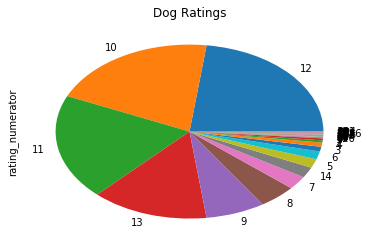

In [131]:
archive.rating_numerator.value_counts().plot(kind='pie')
plt.title('Dog Ratings')

#### This Pie shows that the 10,11,12,13 are the most numbers used to rate the dogs.

Text(0.5,1,'Dog stages')

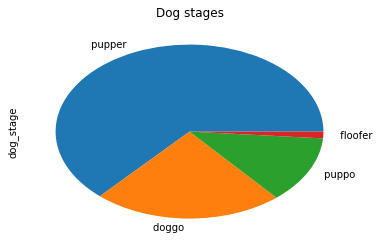

In [132]:
archive.dog_stage.value_counts().plot(kind='pie')
plt.title('Dog stages')

##### Pupper is the most dog stage used  then doggo, puppo and floofer